In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data_url = "https://raw.githubusercontent.com/environmental-data-science" \
            "/eds217_2023/main/data/BSRN_GOB_2019-10.csv"
bsrn = pd.read_csv(data_url)

In [5]:
bsrn.columns

Index(['DATE', 'H_m', 'SWD_Wm2', 'STD_SWD', 'DIR_Wm2', 'STD_DIR', 'DIF_Wm2',
       'STD_DIF', 'LWD_Wm2', 'STD_LWD', 'SWU_Wm2', 'LWU_Wm2', 'T_degC', 'RH',
       'P_hPa'],
      dtype='object')

In [6]:
bsrn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44640 entries, 0 to 44639
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     44640 non-null  object 
 1   H_m      44640 non-null  int64  
 2   SWD_Wm2  44630 non-null  float64
 3   STD_SWD  44637 non-null  float64
 4   DIR_Wm2  44623 non-null  float64
 5   STD_DIR  44623 non-null  float64
 6   DIF_Wm2  44632 non-null  float64
 7   STD_DIF  44632 non-null  float64
 8   LWD_Wm2  44589 non-null  float64
 9   STD_LWD  44637 non-null  float64
 10  SWU_Wm2  44640 non-null  int64  
 11  LWU_Wm2  44640 non-null  int64  
 12  T_degC   44640 non-null  float64
 13  RH       44640 non-null  float64
 14  P_hPa    44640 non-null  int64  
dtypes: float64(10), int64(4), object(1)
memory usage: 5.1+ MB


In [7]:
type(bsrn['DATE'])

pandas.core.series.Series

In [8]:
bsrn.head()

,DATE,H_m,SWD_Wm2,STD_SWD,DIR_Wm2,STD_DIR,DIF_Wm2,STD_DIF,LWD_Wm2,STD_LWD,SWU_Wm2,LWU_Wm2,T_degC,RH,P_hPa
0,2019-10-01 00:00:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.2,30.7,966
1,2019-10-01 00:01:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.3,0,383,16.4,30.7,966
2,2019-10-01 00:02:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.2,0,383,16.5,30.5,966
3,2019-10-01 00:03:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.5,30.4,966
4,2019-10-01 00:04:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.8,30.5,966


In [9]:
first_record = bsrn[['DATE','SWD_Wm2', 'DIR_Wm2','DIF_Wm2','LWD_Wm2']]
first_record_final = first_record.iloc[::1440]
first_record_final.tail()

,DATE,SWD_Wm2,DIR_Wm2,DIF_Wm2,LWD_Wm2
37440,2019-10-27 00:00:00,-3.0,0.0,-3.0,321.0
38880,2019-10-28 00:00:00,-2.0,0.0,-2.0,285.0
40320,2019-10-29 00:00:00,-3.0,0.0,-3.0,287.0
41760,2019-10-30 00:00:00,-3.0,0.0,-3.0,302.0
43200,2019-10-31 00:00:00,-2.0,0.0,-2.0,340.0


In [10]:
first_record_hour = bsrn[['DATE','SWD_Wm2', 'DIR_Wm2','DIF_Wm2','LWD_Wm2']]
first_record_hour_final = first_record.iloc[::60]
first_record_hour_final_series = first_record_hour_final['DATE'].squeeze()
type(first_record_hour_final_series)

pandas.core.series.Series

In [11]:
bsrn['DATE'] = pd.to_datetime(bsrn.DATE)
bsrn.set_index('DATE', inplace=True)

In [12]:
bsrn[['SWD_Wm2', 'DIR_Wm2','DIF_Wm2','LWD_Wm2']].apply(np.mean)


SWD_Wm2    318.046516
DIR_Wm2    348.581987
DIF_Wm2     65.294542
LWD_Wm2    342.350692
dtype: float64

In [13]:
bsrn['NET_SW']= bsrn.SWD_Wm2- bsrn.SWU_Wm2
bsrn['NET_LW']= bsrn.LWD_Wm2- bsrn.LWU_Wm2
bsrn['NET_RAD']= bsrn.SWD_Wm2 - bsrn.SWU_Wm2 + bsrn.LWD_Wm2 - bsrn.LWU_Wm2


In [14]:
bsrn.head()

,H_m,SWD_Wm2,STD_SWD,DIR_Wm2,STD_DIR,DIF_Wm2,STD_DIF,LWD_Wm2,STD_LWD,SWU_Wm2,LWU_Wm2,T_degC,RH,P_hPa,NET_SW,NET_LW,NET_RAD
DATE,,,,,,,,,,,,,,,,,
2019-10-01 00:00:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.2,30.7,966,-3.0,-83.0,-86.0
2019-10-01 00:01:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.3,0,383,16.4,30.7,966,-3.0,-83.0,-86.0
2019-10-01 00:02:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.2,0,383,16.5,30.5,966,-3.0,-83.0,-86.0
2019-10-01 00:03:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.5,30.4,966,-3.0,-83.0,-86.0
2019-10-01 00:04:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.8,30.5,966,-3.0,-83.0,-86.0


In [18]:
daily_rad = []
for d in bsrn.index.day.unique():
    avg_SWD = bsrn.SWD_Wm2[bsrn.index.day == d].mean()
    avg_SWU = bsrn.SWU_Wm2[bsrn.index.day == d].mean()
    avg_LWD = bsrn.LWD_Wm2[bsrn.index.day == d].mean()
    avg_LWU = bsrn.LWU_Wm2[bsrn.index.day == d].mean()
    rnet = avg_SWD - avg_SWU + avg_LWD - avg_LWU   
    daily_rad.append([d, avg_SWD, avg_SWU,avg_LWD, avg_LWU, rnet ])

daily_SW = pd.DataFrame(daily_rad, columns=['day', 'SW_in', 'SW_out', 'LW_in', 'LW_out','Net TR'])
daily_SW.head()


,day,SW_in,SW_out,LW_in,LW_out,Net TR
0,1,325.336345,115.334028,321.219903,458.834028,72.388192
1,2,322.732453,113.939583,318.131341,448.486111,78.438100
2,3,298.635417,103.261806,330.516667,429.979861,95.910417
3,4,323.209173,113.222222,314.129526,439.990972,84.125505
4,5,296.861806,105.461806,324.660876,427.359722,88.701153


In [19]:
river = ['amazon', 'congo','yangtze','mississippi']
length = [6400, 4371, 6418, 3730]
drainage = [7050000, 4014500, 1808500, 3202230]
df1 = pd.DataFrame(list(zip(river, length, drainage)), 
                   columns = ['River', 'Length(km)', 'Drainage area (km^2)'])
df1.head()

,River,Length(km),Drainage area (km^2)
0,amazon,6400,7050000
1,congo,4371,4014500
2,yangtze,6418,1808500
3,mississippi,3730,3202230


In [20]:
df = {
    'River':['Zambezi', 'Mekong','Murray','Rhone','Cubango'],
    'Length(km)': [2574,4023,2508,813,1056],
    'Drainage area (km^2)': [1331000,811000,1061469,98000,530000]
}
df2 = pd.DataFrame(df)

In [21]:
river_data = pd.concat([df1,df2])
river_data.head()

,River,Length(km),Drainage area (km^2)
0,amazon,6400,7050000
1,congo,4371,4014500
2,yangtze,6418,1808500
3,mississippi,3730,3202230
0,Zambezi,2574,1331000


In [29]:
rivers_1 = {
    'Discharge (m^2/s)': [209000,41200,30166,16792,3400,16000,767,1710,475],
    'Mouth' : ['Atlantic Ocean', 'Atlantic Ocean','East China Sea','Gulf of Mexico','Indian Ocean','South China Sea','Southern Ocean','Mediterranean Sea','Okavango Delta'],
    'Source' : ['Rio Mantaro','Lualaba River','Jianggendiru Glacier','Lake Itasca','Miombo Woodlands','Lasagongma Spring',' Australian Alps','Rhone Glacier','Bie Plateau'],
    'Continent' : ['South America','Africa','Asia','North America','Africa','Asia','Oceania','Europe','Africa']
}
rivers = pd.DataFrame(data = rivers_1)
rivers.head()


,Discharge (m^2/s),Mouth,Source,Continent
0,209000,Atlantic Ocean,Rio Mantaro,South America
1,41200,Atlantic Ocean,Lualaba River,Africa
2,30166,East China Sea,Jianggendiru Glacier,Asia
3,16792,Gulf of Mexico,Lake Itasca,North America
4,3400,Indian Ocean,Miombo Woodlands,Africa


In [30]:
river_data['tmp'] = 1
rivers['tmp'] = 1

final_df = pd.merge(river_data, rivers, on=['tmp'])
final_df = final_df.drop('tmp', axis=1)
final_df.head()

,River,Length(km),Drainage area (km^2),Discharge (m^2/s),Mouth,Source,Continent
0,amazon,6400,7050000,209000,Atlantic Ocean,Rio Mantaro,South America
1,amazon,6400,7050000,41200,Atlantic Ocean,Lualaba River,Africa
2,amazon,6400,7050000,30166,East China Sea,Jianggendiru Glacier,Asia
3,amazon,6400,7050000,16792,Gulf of Mexico,Lake Itasca,North America
4,amazon,6400,7050000,3400,Indian Ocean,Miombo Woodlands,Africa


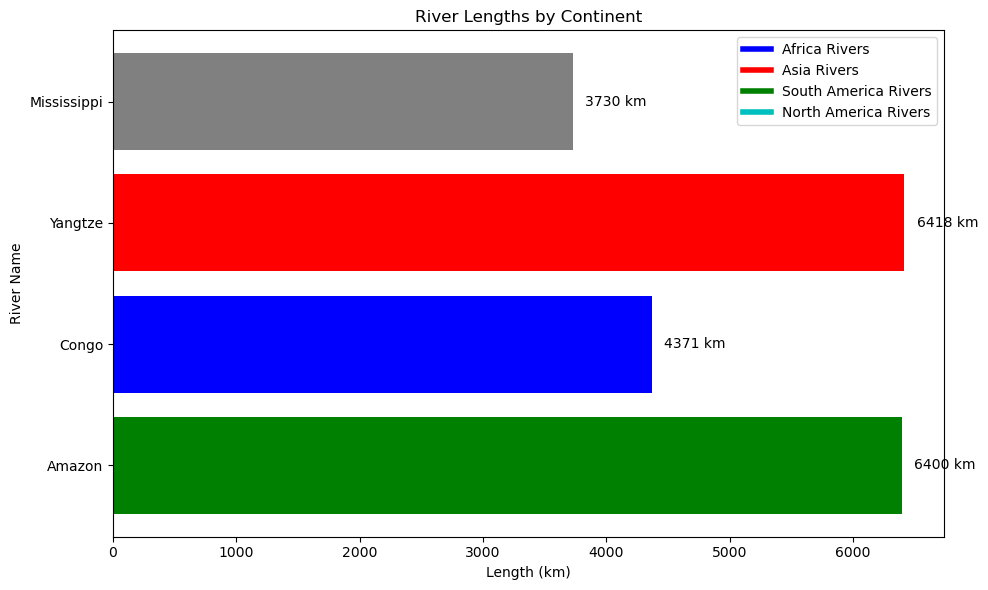

In [36]:
rivers = [
    {"name": "Amazon", "length": 6400, "drainage_area": 7050000, "continent": "South America"},
    {"name": "Congo", "length": 4371, "drainage_area": 4014500, "continent": "Africa"},
    {"name": "Yangtze", "length": 6418, "drainage_area": 1808500, "continent": "Asia"},
    {"name": "Mississippi", "length": 3730, "drainage_area": 3202230, "continent": "North America"},
]

# Extract data for plotting
river_names = [river["name"] for river in rivers]
river_lengths = [river["length"] for river in rivers]
continents = [river["continent"] for river in rivers]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(river_names, river_lengths, color=[colors.get(continent, 'gray') for continent in continents])

# Set axis labels and title
plt.xlabel('Length (km)')
plt.ylabel('River Name')
plt.title('River Lengths by Continent')

# Add data labels
for i in range(len(river_names)):
    plt.text(river_lengths[i] + 100, i, f'{river_lengths[i]} km', va='center')

# Customize colors and legends based on continents
colors = {'Africa': 'b', 'South America': 'g', 'Asia': 'r', 'North America': 'c'}  # Add more colors for other continents if needed
legend_labels = {continent: f'{continent} Rivers' for continent in set(continents)}

legend_handles = [plt.Line2D([0], [0], color=colors[continent], lw=4, label=legend_labels[continent]) for continent in set(continents)]

plt.legend(handles=legend_handles)

# Show the graph
plt.tight_layout()
plt.show()

In [42]:
csv_file_path = '../data/rivers.csv'
final_df.to_csv(csv_file_path)

In [43]:
csv_file_path = '../data/bsrn.csv'
bsrn.to_csv(csv_file_path)